In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

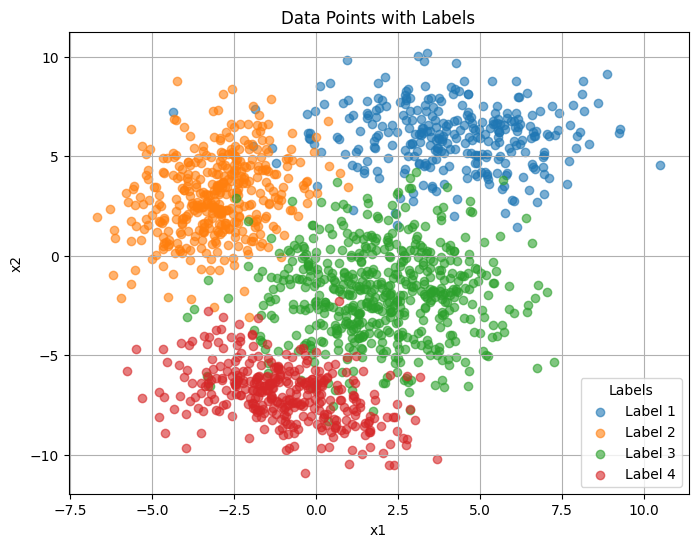

In [6]:
df = pd.read_csv('HW11-ClusteringData.csv', header=None, names=['x1', 'x2', 'label'])
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f"Label {label}", alpha=0.6)
plt.title("Data Points with Labels")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Labels")
plt.grid(True)
plt.show()

In [ ]:
def EuclideanDistance(v, axis):
    return np.linalg.norm(v, axis=axis)
def ManhattanDistance():
    def distance(v, axis):
        return np.sum(np.abs(v), axis=axis)
    return distance
def AvgSilhouetteScore(data, labels, distance):
    AvgS = 0
    unique_labels = np.unique(labels)
    for i in range(labels):
        cur_sample = data[i]
        cur_label = labels[i]

        same_cluster = data[labels == cur_label]
        a = np.mean([distance(cur_sample - sample, axis=0) for sample in same_cluster if sample != cur_sample])

        b = np.inf
        for label in unique_labels:
            if label != cur_label:
                other_cluster = data[labels == label]
                b = min(b, np.mean([distance(cur_sample - sample, axis=0) for sample in other_cluster]))
        
        AvgS += (b - a) / max(a, b)
    return AvgS / len(labels)

In [ ]:
class Kmeans:
    def __init__(self, k, distance, max_iters=10000, tol=1e-4):
        self.k = k
        self.distance = distance
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
    
    def _init_centroids(self, data):
        indices = np.random.choice(data.shape[0], self.k, replace=False)
        return data[indices]
    
    def _assign_clusters(self, data):
        distances = self.distance(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _updata_centroids(self, data, labels):
        return np.array([data[labels == i].mean(axis=0) for i in range(self.k)])
    
    def fit(self, data):
        self.centroids = self._init_centroids(data)
        for i in range(self.max_iters):
            labels = self._assign_clusters(data)
            new_centroids = self._updata_centroids(data, labels)
            if np.all(self.distance(new_centroids - self.centroids, axis=1) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, data):
        return self._assign_clusters(data)

In [ ]:
data = df.iloc[:, :2].to_numpy()
model = Kmeans(4, EuclideanDistance)
model.fit(data)

In [50]:
labels = model.predict(data)
labels.max()

np.int64(3)